In [1]:
import importlib
import sys
sys.path.append("../")
sys.path.append("../mml_experiments")
importlib.import_module('MyConfig')
from mml_experiments.cs_manager import set_cs
%load_ext autoreload
%autoreload 2


import sys
sys.path.append("..")
from utils.img_utils import *
from testing.test_dataset import *
from dataio.MimicCXRDataset import get_splits_MIMIC_CXR
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
# set config store
from mml_experiments.MyConfig import MyConfig
set_cs()
with initialize(version_base=None, config_path="../mml_experiments/conf"):
       cfg = compose(config_name="config")

cfg.experiment.view_position = "AP"
print("running config:",cfg)

running config: {'dataset': {'name': 'MIMIC-CXR', 'root_dir': 'MISSING', 'num_workers': 8, 'root_dir_PA': '/Users/ago/PycharmProjects/mml/data/PA/mimic-cxr-preprocessed-16012024', 'root_dir_AP': '/Users/ago/PycharmProjects/mml/data/AP/mimic-cxr-preprocessed-17012024', 'trans_resize': 224, 'augmentation': 'imagenet_style'}, 'model': {'name': 'resnet18mimic', 'seed': 42, 'device': 'cuda', 'batch_size': 128, 'epochs': 10, 'initial_lr': 0.0001}, 'log': {'wandb_entity': 'mml', 'wandb_group': 'mml', 'wandb_run_name': 'mml', 'wandb_project_name': 'mml', 'wandb_log_freq': 50, 'wandb_offline': True, 'dir_logs': '/Users/ago/PycharmProjects/mml/logs'}, 'experiment': {'task': 'binary_classification', 'name': 'experiment', 'target_list': ['Pneumonia'], 'label_policy': 'remove_uncertain', 'view_position': 'AP', 'splitting_method': 'random', 'seed': 42, 'train_val_split': 0.6, 'test_val_split': 0.5}}


## Verify splits

In [2]:
train_dict, test_dict, val_dict = get_splits_MIMIC_CXR(cfg)

Root dir:  /Users/ago/PycharmProjects/mml/data/AP/mimic-cxr-preprocessed-17012024
Image matrix shape:  (147166, 224, 224)
Number of metadata rows:  147166
Dropping readings with uncertain values in selected class names
Number of filtered metadata rows:  133665
Number of patients in the training set:  19303
Number of patients in the val set:  6435
Number of patients in the test set:  6435
Number of images in train set:  79944
Number of images in val set:  27300
Number of images in test set:  26421


In [3]:
run_test(train_dict['dicom_ids'], test_dict['dicom_ids'], val_dict['dicom_ids'])
run_test(train_dict['ids'], test_dict['ids'], val_dict['ids'])

No overlapping splits found.
Test passed.
No overlapping splits found.
Test passed.


In [4]:

# describe train, test, val datasets
print("train set description", train_dict['labels'].fillna(0).describe())
print("test set description", test_dict['labels'].fillna(0).describe())
print("val set description", val_dict['labels'].fillna(0).describe())

train set description           Pneumonia
count  79944.000000
mean       0.085710
std        0.279937
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
test set description           Pneumonia
count  27300.000000
mean       0.089597
std        0.285609
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
val set description           Pneumonia
count  26421.000000
mean       0.079142
std        0.269965
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


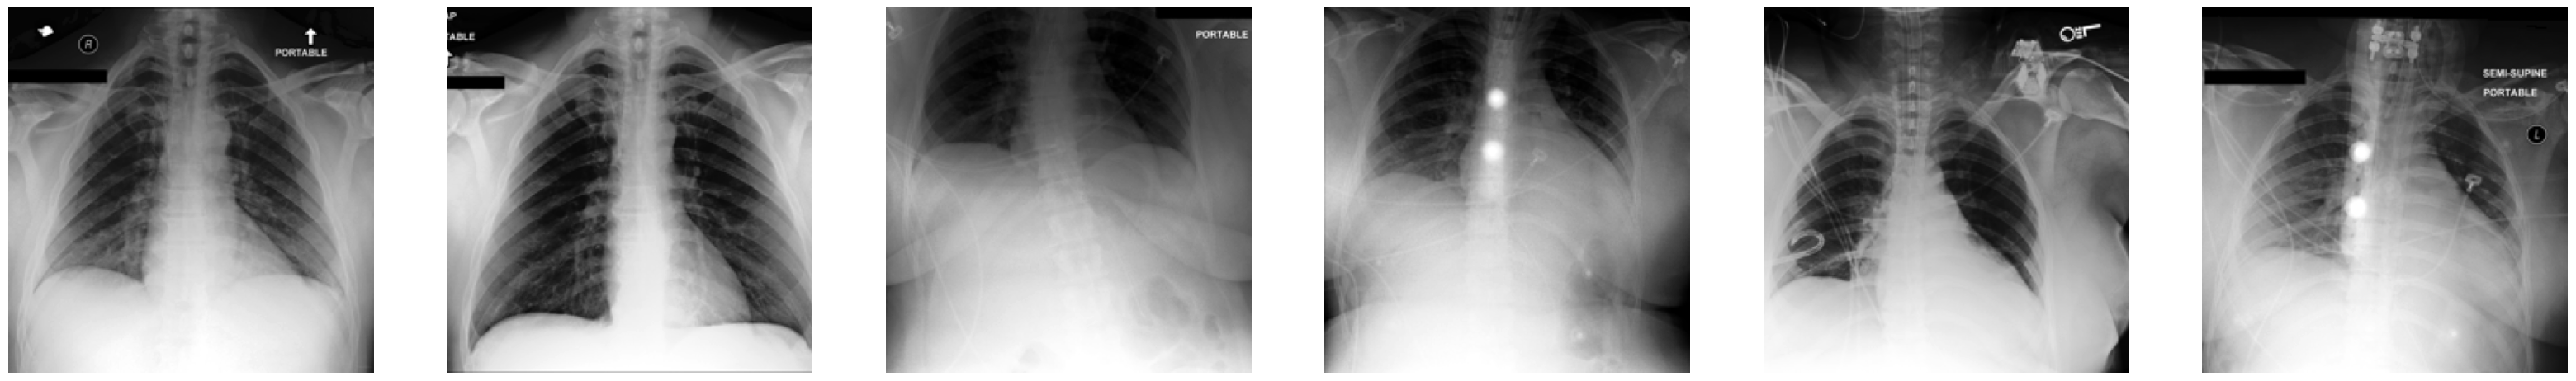

In [8]:
# plot images with target labels = 1
idx, el = np.where(train_dict['labels'].fillna(0).astype(int) == 0)
plot_n_imgs(imgs=train_dict['images'][idx][101:107],n_cols=6,n_rows=1, size=(40,40))

In [9]:
train_dict['labels'].fillna(0).astype(int)


,Pneumonia
0,0
1,0
2,0
3,1
4,0
...,...
79939,0
79940,0
79941,0
79942,0


In [64]:
import torch
label = torch.from_numpy((train_dict['labels'].iloc[[10]].values).astype(int)).float()

label.shape

/var/folders/s4/wfrh1cz91dnd3d1kz2nz4dq80000gn/T/ipykernel_1373/1307996838.py:2: RuntimeWarning: invalid value encountered in cast
  label = torch.from_numpy((train_dict['labels'].iloc[[10]].values).astype(int)).float()


torch.Size([1, 1])

In [54]:
labels = np.array(labels, dtype=np.float32)
labels

array([[nan],
       [nan]], dtype=float32)

In [60]:
index = train_dict['labels'].iloc[10].name
index

10

In [55]:
import torch
labels = torch.from_numpy(labels)
labels

tensor([[nan],
        [nan]])

In [51]:
labels.shape

torch.Size([2, 1])

In [29]:
idx

array([    3,     5,     6, ..., 25846, 25847, 25848])

In [10]:
train_dict['dicom_ids'][idx]

0        68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714
1        fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818
2        ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c
4        8e3f2822-0c1d4b71-2a265bbf-5b96e531-ccf5fa30
5        88498b37-c21dc7ba-bc202800-b517a62d-f7ac5bcf
                             ...                     
79939    ee9155f3-944c056b-c76c73d0-3f792f2c-92ae461e
79940    16b6c70f-6d36bd77-89d2fef4-9c4b8b0a-79c69135
79941    7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08
79942    58766883-376a15ce-3b323a28-6af950a0-16b793bd
79943    1a1fe7e3-cbac5d93-b339aeda-86bb86b5-4f31e82e
Name: dicom_id, Length: 73092, dtype: object

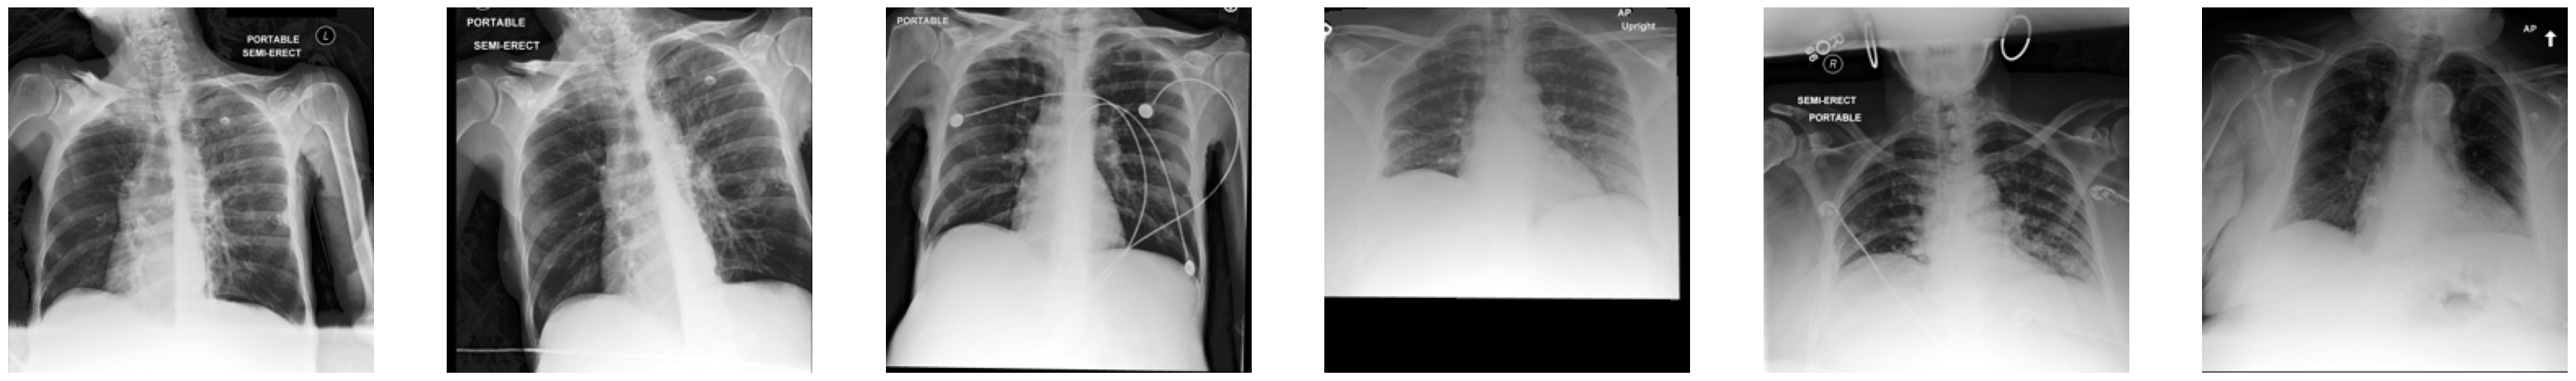

In [12]:
# plot images with target labels = 0
idx, el = np.where(train_dict['labels'].fillna(0).astype(int) == 0)
plot_n_imgs(imgs=train_dict['images'][idx][0:6],n_cols=6,n_rows=1, size=(40,40))

In [13]:
train_dict['dicom_ids'][idx]

0        68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714
1        fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818
2        ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c
4        8e3f2822-0c1d4b71-2a265bbf-5b96e531-ccf5fa30
5        88498b37-c21dc7ba-bc202800-b517a62d-f7ac5bcf
                             ...                     
79939    ee9155f3-944c056b-c76c73d0-3f792f2c-92ae461e
79940    16b6c70f-6d36bd77-89d2fef4-9c4b8b0a-79c69135
79941    7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08
79942    58766883-376a15ce-3b323a28-6af950a0-16b793bd
79943    1a1fe7e3-cbac5d93-b339aeda-86bb86b5-4f31e82e
Name: dicom_id, Length: 73092, dtype: object

# Verify dataset

filling nan with zeros is a good idea? -> example index 101 training set


In [40]:
from dataio.MimicCXRDataset import CXRDataset
from torchvision import transforms


transformList = [transforms.RandomAffine(degrees=(0, 5), translate=(0.05, 0.05), shear=(5)),
                 transforms.RandomHorizontalFlip(), transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]
transform = transforms.Compose(transformList)

#transform = transforms.Compose([
    # you can add other transformations in this list
#    transforms.ToTensor()
#])
train_dataset = CXRDataset(label_name=cfg.class_names[0],labels_df=train_dict['labels'],images=train_dict['images'],transform=transform)

In [41]:
image, label = train_dataset.__getitem__(101) #check 101
print(f'label:{label}')

label:1.0


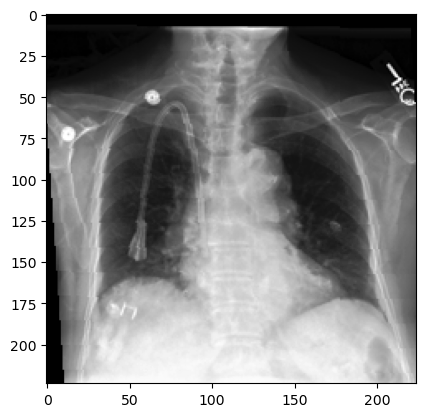

In [42]:
# plot image
plt.imshow(image[0], cmap='gray')

In [43]:
train_dict['dicom_ids'][101]

'efe8834c-2f3e9afb-011c86bc-4506aff3-204a3256'

In [44]:
train_dict['labels'].iloc[101]


No Finding    1.0
Name: 101, dtype: float64

# Verify dataloader


In [45]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


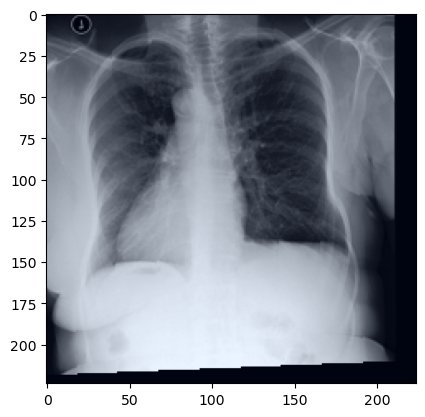

Label: 1.0
Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


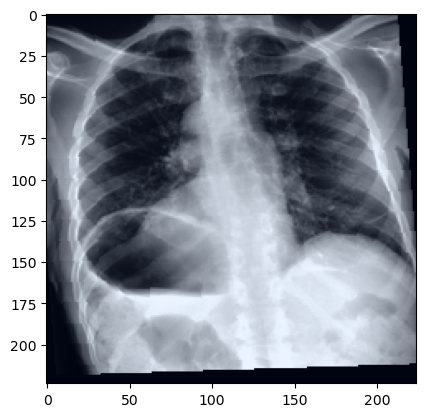

Label: 0.0


In [54]:
# Display image and label.
while label == 1:
       train_features, train_labels = next(iter(train_dataloader))
       print(f"Feature batch shape: {train_features.size()}")
       print(f"Labels batch shape: {train_labels.size()}")
       img = train_features[0].squeeze().permute(1,2,0)
       img -= img.min()
       img /= img.max()
       label = train_labels[0]
       plt.imshow(img)
       plt.show()
       print(f"Label: {label}")
label = 1